<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Wine Quality</font></h1>
<h2 align="center"><font size="5">Deadline (Version 1.0): 2020-12-03 17:00:00</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Your information:
- Fullname:
- Date of birth:
- Place of birth:
- Email:
- Mobile phone:

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Linear Algorithm** to predict: "wine quality" by accuracy evaluation methods.

Please read [Wine Quality information](https://archive.ics.uci.edu/ml/datasets/wine+quality) carefully before you do this project! 

Dataset: winequality-red.csv and winequality-white.csv

#### Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

###### Output variable (based on sensory data):
12. quality (score between 0 and 10)

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression/ Logistic Regression
    - Model Evaluation using Test set
    - Report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
dataRaw = pd.read_csv("winequality-white.csv")

In [3]:
dataRaw

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
...,...
4893,6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...
4894,6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...
4895,6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....
4896,5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...


In [4]:
columns_names = 'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'
columns_names = list(enumerate(columns_names.replace('"',"").split(";")))
columns_names

[(0, 'fixed acidity'),
 (1, 'volatile acidity'),
 (2, 'citric acid'),
 (3, 'residual sugar'),
 (4, 'chlorides'),
 (5, 'free sulfur dioxide'),
 (6, 'total sulfur dioxide'),
 (7, 'density'),
 (8, 'pH'),
 (9, 'sulphates'),
 (10, 'alcohol'),
 (11, 'quality')]

In [5]:
def split_data(column_index, x):
    temp_split = x.split(";")
    return temp_split[column_index]

In [6]:
for column_index, column_name in columns_names:
    dataRaw[column_name] = dataRaw['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].apply(lambda x: split_data(column_index, x)).astype(float)

In [7]:
dataRaw

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality""",fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


In [8]:
dataRaw = dataRaw.drop(columns=['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'])
dataRaw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


## Xác định các thuộc tính biến ( Variable Identification)
* Xác định inputs / output
* Inputs: Tất cả các thuộc tính trong dataset trừ "quality"
* Output: "quality"

## Xác định kiểu dữ liệu của thuộc tính

In [9]:
dataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


## Phân tích đơn biến

In [10]:
numbers = [f for f in dataRaw.columns if dataRaw.dtypes[f] != 'object']
numbers

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [11]:
categories = [f for f in dataRaw.columns if dataRaw.dtypes[f] == 'object']
categories

[]

In [12]:
for i in dataRaw.columns:
    print("Column name: ",i)
    print(dataRaw[i].unique())

Column name:  fixed acidity
[ 7.    6.3   8.1   7.2   6.2   8.6   7.9   6.6   8.3   7.4   6.5   6.4
  6.8   7.6   6.9   8.5   5.8   7.3   6.7   6.    7.1   6.1   7.5   9.8
  5.5   5.9   7.8   5.7   8.2   5.6   5.2   8.4  10.2   7.7   5.3   5.4
  9.1   5.    8.   10.    5.1   9.2   9.    8.8   8.7   4.8  10.3   9.4
  9.6   9.3   8.9   9.7  10.7  14.2   9.9   9.5  11.8   4.6   6.15  4.5
  7.15  6.45  4.2   4.9   4.7   3.8   4.4   3.9 ]
Column name:  volatile acidity
[0.27  0.3   0.28  0.23  0.32  0.22  0.18  0.16  0.42  0.17  0.48  0.66
 0.34  0.31  0.26  0.67  0.25  0.24  0.14  0.12  0.39  0.33  0.45  0.46
 0.19  0.2   0.21  0.38  0.47  0.35  0.54  0.43  0.44  0.265 0.36  0.305
 0.13  0.41  0.485 0.425 0.37  0.255 0.595 0.29  0.53  0.15  0.57  0.4
 0.245 0.685 0.495 0.64  0.52  0.115 0.58  0.585 0.59  0.6   0.55  0.125
 0.1   0.145 0.335 0.365 0.905 0.49  0.155 0.51  0.62  0.345 0.475 0.56
 0.235 0.105 0.5   0.11  0.225 0.395 0.655 0.205 0.415 0.705 0.08  0.68
 0.275 0.61  0.135 0.165 0

In [13]:
dataRaw["quality"] = dataRaw["quality"].astype(int)

In [14]:
dataRaw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [15]:
# Check category in number data.
for i in dataRaw.columns:
    if len(dataRaw[i].unique()) < (dataRaw.shape[0] * 0.1):
        print("Column name: ", i, " :", dataRaw[i].unique())
        categories.append(i)

Column name:  fixed acidity  : [ 7.    6.3   8.1   7.2   6.2   8.6   7.9   6.6   8.3   7.4   6.5   6.4
  6.8   7.6   6.9   8.5   5.8   7.3   6.7   6.    7.1   6.1   7.5   9.8
  5.5   5.9   7.8   5.7   8.2   5.6   5.2   8.4  10.2   7.7   5.3   5.4
  9.1   5.    8.   10.    5.1   9.2   9.    8.8   8.7   4.8  10.3   9.4
  9.6   9.3   8.9   9.7  10.7  14.2   9.9   9.5  11.8   4.6   6.15  4.5
  7.15  6.45  4.2   4.9   4.7   3.8   4.4   3.9 ]
Column name:  volatile acidity  : [0.27  0.3   0.28  0.23  0.32  0.22  0.18  0.16  0.42  0.17  0.48  0.66
 0.34  0.31  0.26  0.67  0.25  0.24  0.14  0.12  0.39  0.33  0.45  0.46
 0.19  0.2   0.21  0.38  0.47  0.35  0.54  0.43  0.44  0.265 0.36  0.305
 0.13  0.41  0.485 0.425 0.37  0.255 0.595 0.29  0.53  0.15  0.57  0.4
 0.245 0.685 0.495 0.64  0.52  0.115 0.58  0.585 0.59  0.6   0.55  0.125
 0.1   0.145 0.335 0.365 0.905 0.49  0.155 0.51  0.62  0.345 0.475 0.56
 0.235 0.105 0.5   0.11  0.225 0.395 0.655 0.205 0.415 0.705 0.08  0.68
 0.275 0.61  0.135 0

In [16]:
continous = [x for x in dataRaw.columns if x not in categories]

In [17]:
continous

['density']

In [18]:
categories

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [19]:
if len(continous + categories) == len(dataRaw.columns):
    print("Success for split data to continous and categories")

Success for split data to continous and categories


## Univariate Analysis

#### Continous

In [20]:
continous

['density']

Describe data:
count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64
----------------
Median data:
0.99374
----------------
Mode data:
0    0.992
dtype: float64
----------------
Mean data:
0.9940273764801896
----------------
Q1
0.9917225000000001
----------------
Q3
0.9961
----------------
IQR
0.004377499999999923
----------------
Variance
8.945524185781203e-06
----------------
Standard Deviation
0.0029909069169369354
----------------
Skew
0.9777730048689898
----------------
Phân phối lệch phải
----------------
Kur
9.793806910765252
----------------
Phân phối nhọn hơn phân phối chuẩn
-----------------
-----------------
Visual data


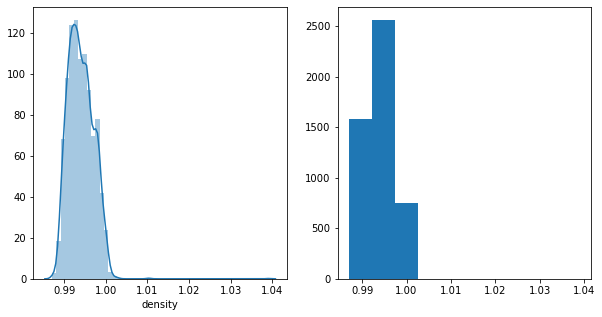

-----------------
-----------------
Visual data with boxplot


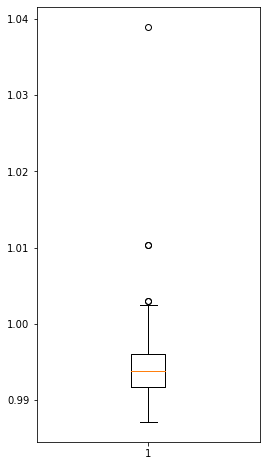

In [21]:
def continous_describe(column_name, data):
    data_temp = data[column_name]
    print('Describe data:')
    print(data_temp.describe())
    print("----------------")
    print("Median data:")
    print(data_temp.median())
    print("----------------")
    print("Mode data:")
    print(data_temp.mode())
    print("----------------")
    print("Mean data:")
    print(data_temp.mean())
    print("----------------")
    print("Q1")
    print(np.percentile(data_temp, 25))
    print("----------------")
    print("Q3")
    print(np.percentile(data_temp, 75))
    print("----------------")
    print("IQR")
    print(scipy.stats.iqr(data_temp))
    print("----------------")
    print("Variance")
    print(data_temp.var())
    print("----------------")
    print("Standard Deviation")
    print(data_temp.std())
    print("----------------")
    print("Skew")
    print(data_temp.skew())
    print("----------------")
    if data_temp.skew() > 0:
        print("Phân phối lệch phải")
    elif data_temp.skew() < 0:
        print(" Phân phối lệch trái")
    else:
        print("Đây là phân phối chuẩn")
    print("----------------")
    print("Kur")
    print(data_temp.kurtosis())
    print("----------------")
    if data_temp.kurtosis() > 0:
        print("Phân phối nhọn hơn phân phối chuẩn")
    elif data_temp.kurtosis() < 0:
        print(" Phân phối bẹt hơn phân phối chuẩn")
    else:
        print("Đây là phân phối chuẩn")
    print("-----------------")
    print("-----------------")
    print("Visual data")
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(data_temp)
    plt.subplot(1,2,2)
    plt.hist(data_temp)
    plt.show()
    print("-----------------")
    print("-----------------")
    print("Visual data with boxplot")
    plt.figure(figsize=(4,8))
    plt.boxplot(data_temp)
for i in continous:
    continous_describe(i, dataRaw)

In [22]:
## Kiểm tra Outlier
def outlier_describe(column_name, data):
    lower_outlier = data[data[column_name] > np.percentile(data[column_name], 75) + (1.5 * scipy.stats.iqr(data[column_name]))]
    print('--------------')
    print('Number of outlier lower')
    print(lower_outlier.shape[0])
    upper_outlier = data[data[column_name] < np.percentile(data[column_name], 25) - (1.5 * scipy.stats.iqr(data[column_name]))]
    print('--------------')
    print('Number of outlier lower')
    print(upper_outlier.shape[0])
    print('--------------')
    print('Percentage of outlier')
    print((lower_outlier.shape[0]+upper_outlier.shape[0]) / data[column_name].shape[0])
    print('Xem xét loại bỏ outlier ?')
    
for i in continous:
    outlier_describe(i, dataRaw)

--------------
Number of outlier lower
5
--------------
Number of outlier lower
0
--------------
Percentage of outlier
0.0010208248264597796
Xem xét loại bỏ outlier ?


#### Categorical

In [23]:
categories

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

Column Name:  fixed acidity
Group by categorical
6.80     308
6.60     290
6.40     280
6.90     241
6.70     236
        ... 
6.45       1
3.80       1
14.20      1
10.20      1
3.90       1
Name: fixed acidity, Length: 68, dtype: int64
Plot bar


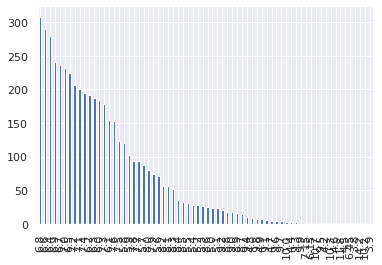

Column Name:  volatile acidity
Group by categorical
0.280    263
0.240    253
0.260    240
0.250    231
0.220    229
        ... 
0.355      1
0.215      1
0.740      1
0.090      1
0.405      1
Name: volatile acidity, Length: 125, dtype: int64
Plot bar


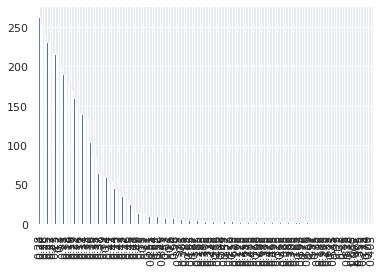

Column Name:  citric acid
Group by categorical
0.30    307
0.28    282
0.32    257
0.34    225
0.29    223
       ... 
1.66      1
0.11      1
0.86      1
0.99      1
1.23      1
Name: citric acid, Length: 87, dtype: int64
Plot bar


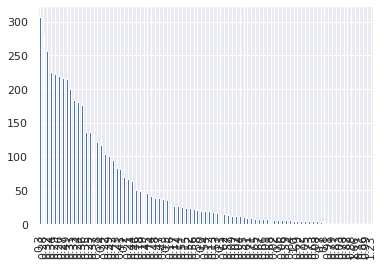

Column Name:  residual sugar
Group by categorical
1.20     187
1.40     184
1.60     165
1.30     147
1.10     146
        ... 
12.75      1
6.55       1
8.55       1
5.55       1
7.85       1
Name: residual sugar, Length: 310, dtype: int64
Plot bar


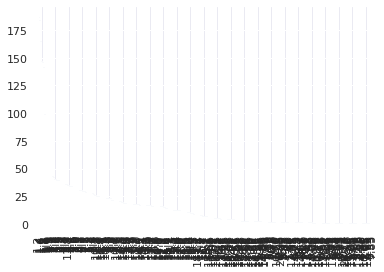

Column Name:  chlorides
Group by categorical
0.044    201
0.036    200
0.042    184
0.040    182
0.046    181
        ... 
0.114      1
0.012      1
0.158      1
0.144      1
0.204      1
Name: chlorides, Length: 160, dtype: int64
Plot bar


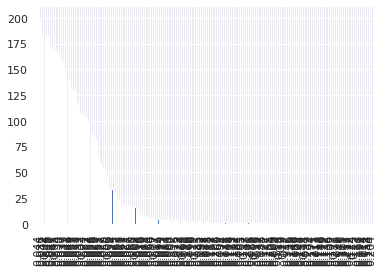

Column Name:  free sulfur dioxide
Group by categorical
29.0     160
31.0     132
26.0     129
35.0     129
34.0     128
        ... 
122.5      1
112.0      1
2.0        1
128.0      1
118.5      1
Name: free sulfur dioxide, Length: 132, dtype: int64
Plot bar


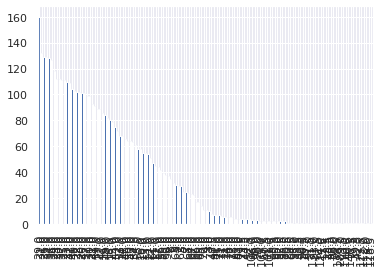

Column Name:  total sulfur dioxide
Group by categorical
111.0    69
113.0    61
117.0    57
118.0    55
128.0    54
         ..
10.0      1
44.0      1
313.0     1
19.0      1
234.5     1
Name: total sulfur dioxide, Length: 251, dtype: int64
Plot bar


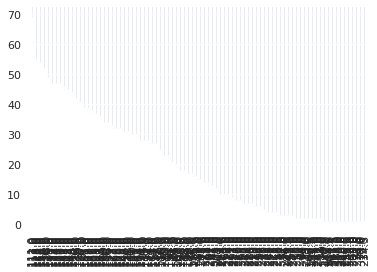

Column Name:  pH
Group by categorical
3.14    172
3.16    164
3.22    146
3.19    145
3.18    138
       ... 
3.79      1
2.84      1
2.74      1
3.81      1
2.82      1
Name: pH, Length: 103, dtype: int64
Plot bar


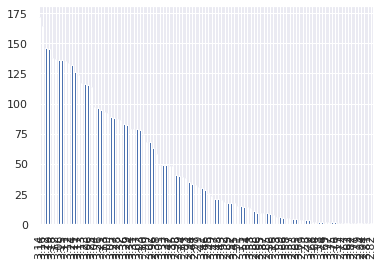

Column Name:  sulphates
Group by categorical
0.50    249
0.46    225
0.44    216
0.38    214
0.42    181
       ... 
0.89      1
1.06      1
0.22      1
0.23      1
0.99      1
Name: sulphates, Length: 79, dtype: int64
Plot bar


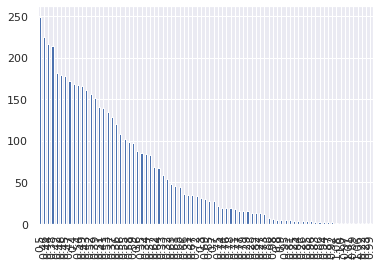

Column Name:  alcohol
Group by categorical
9.400000     229
9.500000     228
9.200000     199
9.000000     185
10.000000    162
            ... 
11.466667      1
12.250000      1
12.333333      1
12.066667      1
11.550000      1
Name: alcohol, Length: 103, dtype: int64
Plot bar


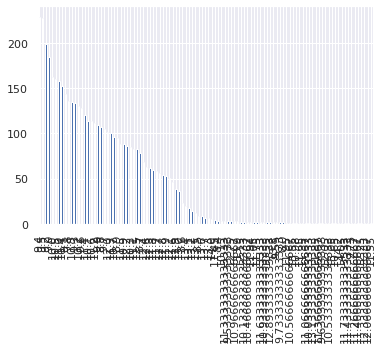

Column Name:  quality
Group by categorical
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64
Plot bar


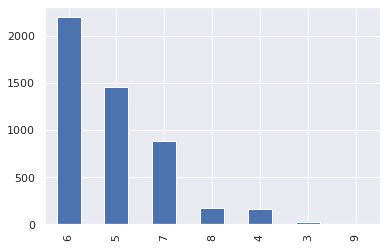

In [24]:
def describe_categorical(column_name, data):
    print("Column Name: ", column_name)
    data_temp = data[column_name].value_counts()
    print("Group by categorical")
    print(data_temp)
    print("Plot bar")
    sns.set()
    data_temp.plot.bar()
    plt.show()
for i in categories:
    describe_categorical(i, dataRaw)

## Multivariate Analys

####  Categorical and Continous

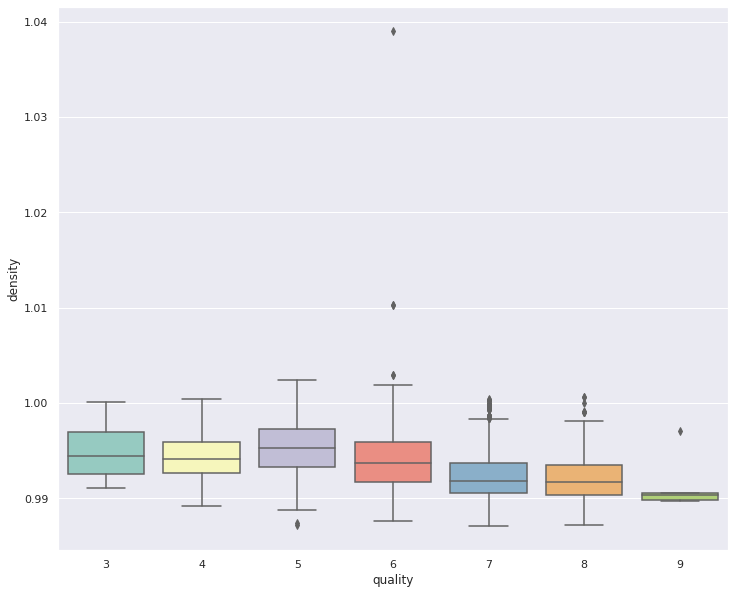

              sum_sq      df           F         PR(>F)
C(quality)  0.005035     6.0  105.856434  8.499687e-126
Residual    0.038771  4891.0         NaN            NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     3      4  -0.0006    0.9 -0.0026  0.0014  False
     3      5   0.0004    0.9 -0.0015  0.0022  False
     3      6  -0.0009 0.7416 -0.0028  0.0009  False
     3      7  -0.0024 0.0026 -0.0043 -0.0006   True
     3      8  -0.0026 0.0013 -0.0046 -0.0007   True
     3      9  -0.0034 0.1851 -0.0076  0.0007  False
     4      5    0.001  0.001  0.0003  0.0017   True
     4      6  -0.0003 0.7882  -0.001  0.0004  False
     4      7  -0.0018  0.001 -0.0025 -0.0011   True
     4      8   -0.002  0.001 -0.0029 -0.0011   True
     4      9  -0.0028 0.2938 -0.0066   0.001  False
     5      6  -0.0013  0.001 -0.0016  -0.001   True
     5      7  -0.0028  0.001 -0.0032

In [25]:
# Check the effect of Continous to quality of wine
# Anova 1 way
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

continous_affect = []
def categorical_con(cate, con, data):
    data_temp = data[[cate, con]]
    data.head()
    plt.figure(figsize=(12, 10))
    sns.boxplot(x=cate, y=con, data=data_temp, palette='Set3')
    plt.show()
    model = ols(f'{con} ~C({cate})', data=data_temp, missing='drop').fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)
    m_comp = pairwise_tukeyhsd(endog=data_temp[con], groups=data_temp[cate], alpha=0.05)
    print(m_comp)
    return anova_table["PR(>F)"].iloc[0] < 0.05

for i in continous:
    if (categorical_con('quality', i, dataRaw)):
        continous_affect.append(i)
print("*******")
print("Continous affect: ", continous_affect)

#### Categorical and Categorial

In [26]:
categories

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

Analys  quality  and  fixed acidity
----------------------------
Crosstab Data:
----------------------------
fixed acidity  3.8   3.9   4.2   4.4   4.5   4.6   4.7   4.8   4.9   5.0   \
quality                                                                     
3                 0     0     1     0     0     0     0     0     0     0   
4                 0     0     0     0     0     0     0     1     0     0   
5                 0     0     0     0     1     1     2     1     4     2   
6                 1     0     0     1     0     0     2     3     2    14   
7                 0     0     1     1     0     0     1     4     0     6   
8                 0     1     0     1     0     0     0     0     1     2   
9                 0     0     0     0     0     0     0     0     0     0   

fixed acidity  ...  9.6   9.7   9.8   9.9   10.0  10.2  10.3  10.7  11.8  14.2  
quality        ...                                                              
3              ...     0     0     

<Figure size 720x360 with 0 Axes>

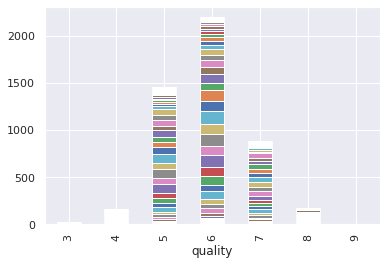

----------------------------
Chi-Square Test
dof =  402
p =  1.2118125171608471e-100
probability 0.95, critical=449.74870209866117, stat=1336.133910332499
significance=0.050000000000000044, p=1.2118125171608471e-100
Dependent (reject H0)
Analys  quality  and  volatile acidity
----------------------------
Crosstab Data:
----------------------------
volatile acidity  0.080  0.085  0.090  0.100  0.105  0.110  0.115  0.120  \
quality                                                                    
3                     0      0      0      0      0      0      0      0   
4                     0      0      0      0      0      1      0      0   
5                     0      0      0      1      0      0      0      7   
6                     2      1      1      2      2      7      2     13   
7                     2      0      0      3      4      5      1      8   
8                     0      0      0      0      0      0      0      6   
9                     0      0      0     

<Figure size 720x360 with 0 Axes>

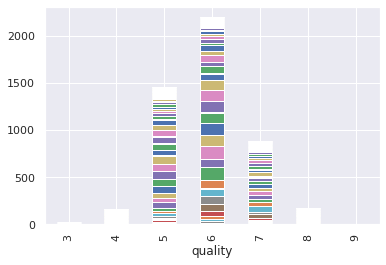

----------------------------
Chi-Square Test
dof =  744
p =  2.1485709327609485e-78
probability 0.95, critical=808.5660965116425, stat=1714.4920201469024
significance=0.050000000000000044, p=2.1485709327609485e-78
Dependent (reject H0)
Analys  quality  and  citric acid
----------------------------
Crosstab Data:
----------------------------
citric acid  0.00  0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  ...  \
quality                                                                  ...   
3               0     0     0     0     0     0     0     0     0     0  ...   
4               6     0     2     0     3     0     0     1     1     1  ...   
5               5     4     2     2     3     2     6     8     2     6  ...   
6               8     0     2     0     4     3     0     3     1     3  ...   
7               0     3     0     0     0     0     0     0     0     2  ...   
8               0     0     0     0     2     0     0     0     0     0  ...   
9               0

<Figure size 720x360 with 0 Axes>

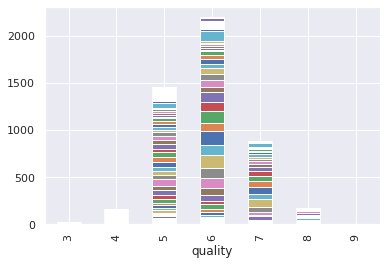

----------------------------
Chi-Square Test
dof =  516
p =  3.367485048978111e-30
probability 0.95, critical=569.9528880530673, stat=970.5640063818784
significance=0.050000000000000044, p=3.367485048978111e-30
Dependent (reject H0)
Analys  quality  and  residual sugar
----------------------------
Crosstab Data:
----------------------------
residual sugar  0.60   0.70   0.80   0.90   0.95   1.00   1.05   1.10   1.15   \
quality                                                                         
3                   0      1      0      0      0      0      0      0      1   
4                   0      1      5      5      0      3      1      7      0   
5                   2      3     11      9      4     38      0     35      1   
6                   0      2      8     21      0     39      0     70      1   
7                   0      0      0      4      0      9      0     30      0   
8                   0      0      1      0      0      4      0      4      0   
9        

<Figure size 720x360 with 0 Axes>

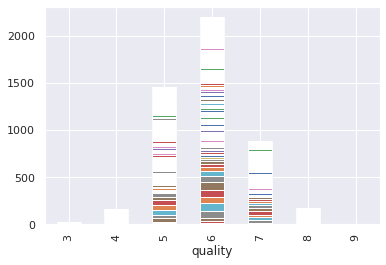

----------------------------
Chi-Square Test
dof =  1854
p =  6.730882278343601e-34
probability 0.95, critical=1955.2847210844648, stat=2689.108839146217
significance=0.050000000000000044, p=6.730882278343601e-34
Dependent (reject H0)
Analys  quality  and  chlorides
----------------------------
Crosstab Data:
----------------------------
chlorides  0.009  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019  \
quality                                                                    
3              0      0      0      0      0      0      0      0      0   
4              0      0      1      1      0      0      0      0      0   
5              1      0      0      0      0      1      1      2      0   
6              0      0      0      0      4      1      2      3      5   
7              0      1      0      2      0      2      2      4      3   
8              0      0      0      1      0      1      0      0      1   
9              0      0      0      0      0      0 

<Figure size 720x360 with 0 Axes>

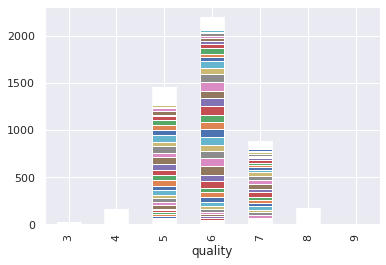

----------------------------
Chi-Square Test
dof =  954
p =  8.5101202845267e-50
probability 0.95, critical=1026.9672253904982, stat=1752.4475628721627
significance=0.050000000000000044, p=8.5101202845267e-50
Dependent (reject H0)
Analys  quality  and  free sulfur dioxide
----------------------------
Crosstab Data:
----------------------------
free sulfur dioxide  2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0    \
quality                                                                       
3                        0      0      0      4      0      0      1      0   
4                        0      3      4      8      9      6      9      7   
5                        1      3      2      9     16      9     11     10   
6                        0      4      5      3      6      8     11      8   
7                        0      0      0      1      0      1      3      4   
8                        0      0      0      0      1      1      0      0   
9                     

<Figure size 720x360 with 0 Axes>

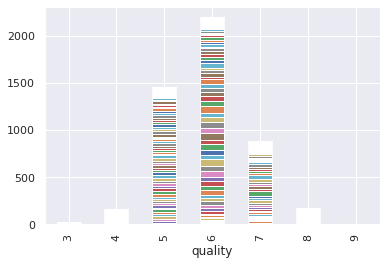

----------------------------
Chi-Square Test
dof =  786
p =  2.953624518505033e-191
probability 0.95, critical=852.332985749568, stat=2591.7417055055985
significance=0.050000000000000044, p=2.953624518505033e-191
Dependent (reject H0)
Analys  quality  and  total sulfur dioxide
----------------------------
Crosstab Data:
----------------------------
total sulfur dioxide  9.0    10.0   18.0   19.0   21.0   24.0   25.0   26.0   \
quality                                                                        
3                         0      0      0      1      0      0      0      0   
4                         0      1      0      0      0      0      1      1   
5                         1      0      0      0      1      2      0      0   
6                         0      0      2      0      0      1      0      0   
7                         0      0      0      0      0      0      0      0   
8                         0      0      0      0      0      0      0      0   
9        

<Figure size 720x360 with 0 Axes>

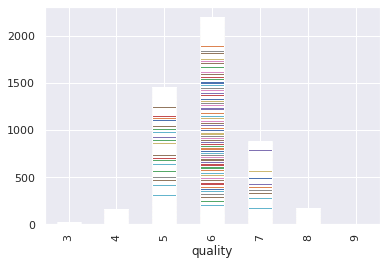

----------------------------
Chi-Square Test
dof =  1500
p =  7.071342888665948e-176
probability 0.95, critical=1591.2149622807226, stat=3618.223185408994
significance=0.050000000000000044, p=7.071342888665948e-176
Dependent (reject H0)
Analys  quality  and  pH
----------------------------
Crosstab Data:
----------------------------
pH       2.72  2.74  2.77  2.79  2.80  2.82  2.83  2.84  2.85  2.86  ...  \
quality                                                              ...   
3           0     0     0     0     0     0     0     0     0     0  ...   
4           0     0     0     0     0     0     1     0     0     0  ...   
5           0     0     0     3     1     0     3     0     4     4  ...   
6           1     1     1     0     2     1     0     0     5     5  ...   
7           0     0     0     0     0     0     0     1     0     0  ...   
8           0     0     0     0     0     0     0     0     0     0  ...   
9           0     0     0     0     0     0     0     0  

<Figure size 720x360 with 0 Axes>

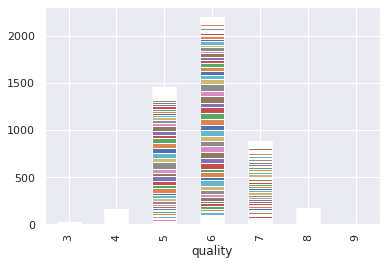

----------------------------
Chi-Square Test
dof =  612
p =  8.664005304274299e-15
probability 0.95, critical=670.6607734170842, stat=920.0284370232856
significance=0.050000000000000044, p=8.664005304274299e-15
Dependent (reject H0)
Analys  quality  and  sulphates
----------------------------
Crosstab Data:
----------------------------
sulphates  0.22  0.23  0.25  0.26  0.27  0.28  0.29  0.30  0.31  0.32  ...  \
quality                                                                ...   
3             0     0     0     0     0     1     0     0     0     1  ...   
4             0     0     1     0     0     2     0     3     3     3  ...   
5             0     0     0     0     1     4     7     6     6    16  ...   
6             0     1     1     1     7     4     7    10    16    13  ...   
7             1     0     1     1     3     2     2    11     9    14  ...   
8             0     0     1     2     2     0     0     1     1     7  ...   
9             0     0     0     0     

<Figure size 720x360 with 0 Axes>

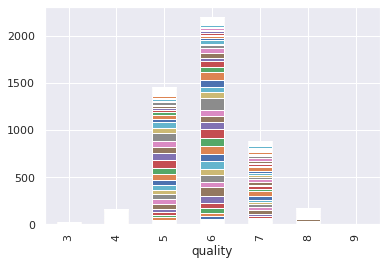

----------------------------
Chi-Square Test
dof =  468
p =  5.863399476398928e-14
probability 0.95, critical=519.4339639500644, stat=732.2387841541724
significance=0.050000000000000044, p=5.863399476398928e-14
Dependent (reject H0)
Analys  quality  and  alcohol
----------------------------
Crosstab Data:
----------------------------
alcohol  8.00   8.40   8.50   8.60   8.70   8.80   8.90   9.00   9.10   9.20   \
quality                                                                         
3            1      0      1      0      0      0      0      0      2      0   
4            0      1      0      4      2      2      3     11      3      8   
5            1      2      3     14     46     54     37     82     67    107   
6            0      0      4      2     16     36     45     63     51     84   
7            0      0      0      3     14      4      4     29     21      0   
8            0      0      1      0      0     11      6      0      0      0   
9            0  

<Figure size 720x360 with 0 Axes>

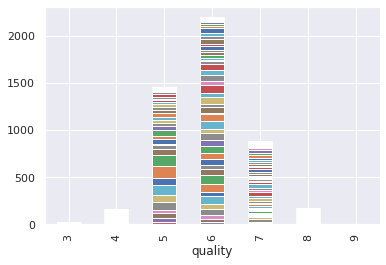

----------------------------
Chi-Square Test
dof =  612
p =  1.0824952342913112e-152
probability 0.95, critical=670.6607734170842, stat=2039.1417745658077
significance=0.050000000000000044, p=1.0824952342913112e-152
Dependent (reject H0)


In [29]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

categorical_affect = []
def categorical_categorical(cate1, cate2, data):
    print("Analys ",cate1, " and ", cate2)
    print("----------------------------")
    table_temp = pd.crosstab(data[cate1], data[cate2])
    print("Crosstab Data:")
    print("----------------------------")
    print(table_temp)
    print("Visual Data with Barplot")
    plt.figure(figsize=(10,5))
    table_temp.plot(kind="bar", stacked=True, legend=None)
    plt.show()
    print("----------------------------")
    print("Chi-Square Test")
    stat, p, dof, expected = chi2_contingency(table_temp)
    print("dof = ", dof)
    print("p = ", p)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print(f'probability {prob}, critical={critical}, stat={stat}')
    # interpret p-value
    alpha = 1.0 - prob
    print(f'significance={alpha}, p={p}')
    if p <= alpha:
        print('Dependent (reject H0)')
        return True
    else:
        print('Independent (fail to reject H0)')
    return False

# Analys category data with output.
for i in categories[:len(categories)-1]:
    if categorical_categorical("quality", i, dataRaw):
        categorical_affect.append(i)
        
print("*******")
print("Categorical affect: ", continous_affect) 